In [160]:
import matplotlib.pyplot as plt
from shapely import geometry
import numpy as np

In [161]:
file = open('input.txt', 'r')
input = file.readlines()
file.close()

In [162]:
points = []
edges = {}

In [163]:
last_point = (0,0)
polygon_length = 0
points.append(last_point)
for line in input:
    linesplit = line.split()
    length = int(linesplit[1])
    polygon_length += length
    if linesplit[0] == 'U':
        new_point = (last_point[0], last_point[1]+length)
    elif linesplit[0] == 'D':
        new_point = (last_point[0], last_point[1]-length)
    elif linesplit[0] == 'R':
        new_point = (last_point[0]+length, last_point[1])
    elif linesplit[0] == 'L':
        new_point = (last_point[0]-length, last_point[1])
    points.append(new_point)
    edges[(last_point, new_point)] = linesplit[2][1:-1]
    last_point = new_point


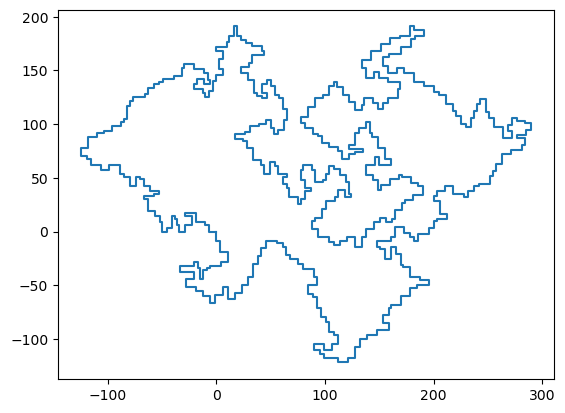

In [164]:
xs, ys = zip(*points)

plt.figure()
plt.plot(xs,ys) 
plt.show()

In [165]:

def point_in_polygon(tuple):
    line = geometry.LineString(points)
    point = geometry.Point(tuple)
    polygon = geometry.Polygon(line)
    return polygon.contains(point)

In [166]:
max_x, max_y, min_x, min_y = 0, 0, 0, 0

for point in points:
    if point[0] > max_x:
        max_x = point[0]
    if point[1] > max_y:
        max_y = point[1]
    if point[0] < min_x:
        min_x = point[0]
    if point[1] < min_y:
        min_y = point[1]
print(max_x, max_y, min_x, min_y)

points_in_polygon = 0
for x in range(min_x, max_x, 1):
    for y in range(min_y, max_y, 1):
        if point_in_polygon((x,y)):
            points_in_polygon += 1

290 191 -125 -122


In [167]:
print(polygon_length, points_in_polygon)
print(polygon_length+points_in_polygon)

3890 45171
49061
